In [1]:
from sage.plot.plot3d.shapes2 import *

In [2]:
# coordinates
ar,ap,az=var('a_rho,a_psi,a_z')
rt,Rb=var('r_t,R_t')
l1,l2,l3=var('l_1,l_2,l_3')
x,y,z=var('x,y,z')
px=cos(2*pi/3)
py=sin(2*pi/3)
A1=rt*vector([1,0,0])
A2=rt*vector([px,py,0])
A3=rt*vector([px,-py,0])
ABs=Rb*vector([1,0,0])
BBs=Rb*vector([px,py,0])
CBs=Rb*vector([px,-py,0])
Ap=vector([x,y,z])

In [3]:
c1=(Ap-A1)*(Ap-A1)-l1^2==0
c2=(Ap-A2)*(Ap-A2)-l2^2==0
c3=(Ap-A3)*(Ap-A3)-l3^2==0

In [4]:
sln=solve([c1,c2,c3],x,y,z)
snx=sln[1][0].rhs().subs(r_t==100)
sny=sln[1][1].rhs().subs(r_t==100)
snz=-expand(sln[1][2]).rhs().subs(r_t==100)

In [5]:
#Rotation matrix for the initial direction of the axis
dtr=pi/180  # degrees to radians
alpha = var('alpha') # rotation angle
ux,uy,uz=var('u_x,u_y,u_z') # vector of rotation of the axis
# angle functions
va=(1-cos(alpha))
ca=cos(alpha)
sa=sin(alpha)
# components of the rotation matrix
sx=ux^2*va+ca
nx=ux*uy*va-uz*sa
ax=ux*uz*va+uy*sa
sy=ux*uy*va+uz*sa
ny=uy^2*va+ca
ay=uy*uz*va-ux*sa
sz=uz*ux*va-uy*sa
nz=uz*uy*va+ux*sa
az=uz^2*va+ca
#assembly of the column vectors
sv=vector([sx, sy, sz])
nv=vector([nx, ny, nz])
av=vector([ax, ay, az])
#assembly of the rotation matrix
R=matrix([[sv[0], nv[0], av[0]],[sv[1], nv[1], av[1]] , [sv[2], nv[2], av[2]]])

In [6]:
R1=R.subs(alpha=80*dtr, u_x=1, u_y=0, u_z=0)
R2=R.subs(alpha=-6*dtr, u_x=0, u_y=0, u_z=1)
vuz=vector([0,0,1])
vtpa=R2*R1*vuz
n(norm(vtpa))

1.00000000000000

In [7]:
R1=R.subs(alpha=41*dtr, u_x=0, u_y=1, u_z=0)
R2=R.subs(alpha=23*dtr, u_x=0, u_y=0, u_z=1)
vux=vector([1,0,0])
vac=R2*R1*vux
n(norm(vac))

1.00000000000000

In [8]:
#Anthropometric values
vK=12;vL=11;vO=16;vP=1;vQ=5;vR=0.54 #anthropometric measurements
H=1750 #heigth in mm
d_m=0.246*H #knee ankle distance
d_p=0.039*H #ankle sole of the foot distance
z_p=-(d_m+d_p) # z initial position 
r_p=60 #platform radius 
ae=2*pi/3 #auxiliar angle
O=vector([0,0,-d_m/2]) #middle shank reference point
#initial position of the platform
A0=vector([r_p,0,z_p]) 
B0=vector([r_p*cos(ae),r_p*sin(ae),z_p])
C0=vector([r_p*cos(-ae),r_p*sin(-ae),z_p])
PM0=(A0+B0+C0)/3 #center of the platform
#marker representation
dot=point3d((0,0,0),size=5,color='red',opacity=.5)
dO=dot.translate(O)
dA0=dot.translate(A0)
dB0=dot.translate(B0)
dC0=dot.translate(C0)
dPM0=dot.translate(PM0)
ptf=polygon([A0,B0,C0],color='red') #platform representation

In [9]:
r_1=vector([0,0,-d_m]) #intersection point between the talocrural axis and the sagittal plane
ap=0.039*H 
lp=0.152*H
#points on the malleolar medial and lateral
M_1=r_1-ap*vR*vtpa
M_2=r_1+ap*(1-vR)*vtpa
tht=41*dtr
#intersection between the subtalar axis and the sagittal plane
r_2=vQ*vector([-cos(tht),0,-sin(tht)])+r_1
#points from the hindfoot to the midfoot
N_1=r_2+0.6*lp*vR*vac
N_2=r_2-0.3*lp*vR*vac
#representation of the kinematic chain
lrt=line([O,r_1])
lm12=line([M_1,M_2])
ln12=line([N_1,N_2])
lrA=line([r_2,A0])
lrB=line([r_2,B0])
lrC=line([r_2,C0])
#representation of the markers
dr1=dot.translate(r_1)
dr2=dot.translate(r_2)
dM1=dot.translate(M_1)
dM2=dot.translate(M_2)
dN1=dot.translate(N_1)
dN2=dot.translate(N_2)
#labels of the markers
lbl = Text('A0',color='black').translate(A0+vector([10,10,10]))
lbl += text3d('B0',B0+vector([10,10,10]))
lbl += text3d('C0',C0-vector([10,10,10]))
lbl += text3d('M1',M_1+vector([10,10,10]))
lbl += text3d('M2',M_2-vector([10,10,10]))
lbl += text3d('N1',N_1+vector([10,10,10]))
lbl += text3d('N2',N_2+vector([10,10,10]))
lbl += text3d('O',O+vector([10,10,10]))
lbl += text3d('r1',r_1+vector([10,10,10]))
lbl += text3d('r2',r_2-vector([10,10,10]))
lbl += text3d('PM0',PM0+vector([10,10,10]))
#plotting and showing the initial position
gr = dO+dA0+dB0+dC0+dPM0+ptf+lrt+lm12+ln12+lrA+lrB+lrC+dM1+dM2+dr1+dr2+dN1+dN2 + lbl
gr.show(aspect_ratio=1,frame=true,figsize=(1024,1024), 
        projection='orthographic', axes = true)

Graphics3d Object

In [10]:
#finding the twist unitary vectors 
w1=n((M_1-M_2)/abs(M_1-M_2))
w2=n((N_1-N_2)/abs(N_1-N_2))
#the perpendicular component
v1=n(-w1.cross_product(r_1))
v2=n(-w2.cross_product(r_2))
#angles for the talocrural and subtalar rotations
theta1=var('theta_1')
theta2=var('theta_2')
#six dimensional vector xi mapping 
xi1=matrix([v1[0],v1[1],v1[2],w1[0],w1[1],w1[2]]).transpose()
xi2=matrix([v2[0],v2[1],v2[2],w2[0],w2[1],w2[2]]).transpose()
#transformation of exponential matrix of rotation
Rexp1=R.subs(alpha=theta_1, u_x=w1[0], u_y=w1[1], u_z=w1[2])
#rotation matrix component of the homogeneous transformation
vexp1=(matrix.identity(3)-Rexp1)*(w1.cross_product(v1))
#conformation of the homogeneous transformation matrix
MTH1=(Rexp1.augment(vexp1)).stack(vector([0,0,0,1]))
#components for the subtalar axis
Rexp2=R.subs(alpha=theta_2, u_x=w2[0], u_y=w2[1], u_z=w2[2])
vexp2=(matrix.identity(3)-Rexp2)*(w2.cross_product(v2))
MTH2=(Rexp2.augment(vexp2)).stack(vector([0,0,0,1]))
#transformation matrix representing the initial position
gst0A=matrix([[1,0,0,A0[0]],[0,1,0,A0[1]],[0,0,1,A0[2]],[0,0,0,1]])
gst0B=matrix([[1,0,0,B0[0]],[0,1,0,B0[1]],[0,0,1,B0[2]],[0,0,0,1]])
gst0C=matrix([[1,0,0,C0[0]],[0,1,0,C0[1]],[0,0,1,C0[2]],[0,0,0,1]])
gst0PM=matrix([[1,0,0,PM0[0]],[0,1,0,PM0[1]],[0,0,1,PM0[2]],[0,0,0,1]])
#product of exponential matrices for all the points
MTHA=MTH1*MTH2*gst0A
MTHB=MTH1*MTH2*gst0B
MTHC=MTH1*MTH2*gst0C
MTHPM=MTH1*MTH2*gst0PM
#components of the group of rigid movements for the central point
f_xpm=MTHPM[0][3]
f_ypm=MTHPM[1][3]
f_zpm=MTHPM[2][3]
#components of the three vertices of the plattform
dp=10 #data points
crvpm=parametric_plot3d([f_xpm, f_ypm, f_zpm], (theta_1, -pi/6, pi/6), (theta_2, -pi/6, pi/6),plot_points=[dp,dp])
f_xA=MTHA[0][3]
f_yA=MTHA[1][3]
f_zA=MTHA[2][3]
crvA=parametric_plot3d([f_xA, f_yA, f_zA], (theta_1, -pi/6, pi/6), (theta_2, -pi/6, pi/6),plot_points=[dp,dp])
f_xB=MTHB[0][3]
f_yB=MTHB[1][3]
f_zB=MTHB[2][3]
crvB=parametric_plot3d([f_xB, f_yB, f_zB], (theta_1, -pi/6, pi/6), (theta_2, -pi/6, pi/6),plot_points=[dp,dp])
f_xC=MTHC[0][3]
f_yC=MTHC[1][3]
f_zC=MTHC[2][3]
crvC=parametric_plot3d([f_xC, f_yC, f_zC], (theta_1, -pi/6, pi/6), (theta_2, -pi/6, pi/6),plot_points=[dp,dp],texture="red")
#representation of the vectors of position scaled
ar1=arrow3d(O,r_1,50,color='cyan')
ar2=arrow3d(O,r_2,50,color='magenta')
aw1=arrow3d(r_1, r_1 + 50*w1,50, color ='red')
aw2=arrow3d(r_2, r_2 + 50*w2,50, color = 'blue')
av1=arrow3d(r_1, r_1 + 50*v1/abs(r_1),50, color ='orange')
av2=arrow3d(r_2, r_2 + 50*v2/abs(r_2),50, color ='purple')
scrws = ar1 +ar2+ aw1+aw2 + av1 + av2

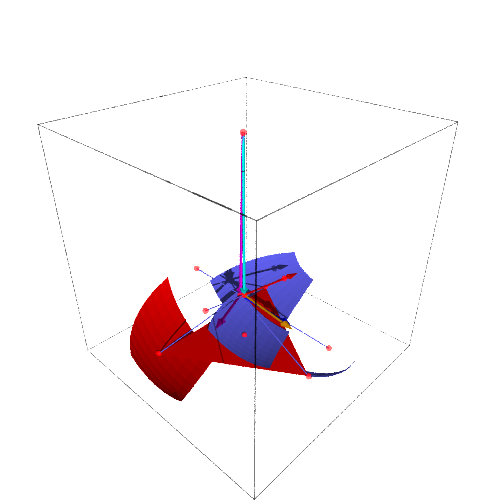

In [12]:
#all the plots in one figure
allgr = crvpm+crvA+crvB+crvC+scrws+gr
allgr.show(viewer='tachyon', camera_center=(4,-4,3),viewdir=(-4,4,-3), raydepth=10)

In [13]:
from sage.interfaces.maxima_lib import *
from sage.symbolic.expression_conversions import *
m = InterfaceInit(maxima) #create the interface with maxima
maxima_lib.set('thmax','%pi/6')
maxima_lib.set('thmin','-%pi/6')

In [14]:
#parametric surface for the middle point
maxima_lib.set('fxpm',m(f_xpm))
maxima_lib.set('fypm',m(f_ypm))
maxima_lib.set('fzpm',m(f_zpm))
maxima.plot3d ("[fxpm, fypm, fzpm]", "[theta_1,thmin,thmax]", "[theta_2,thmin,thmax]", "[grid,50,1]", '[plot_format, openmath]')   

In [15]:
#parametric surface for the A point
maxima_lib.set('fxA',m(f_xA))
maxima_lib.set('fyA',m(f_yA))
maxima_lib.set('fzA',m(f_zA))
maxima.plot3d ("[fxA, fyA, fzA]", "[theta_1,thmin,thmax]", "[theta_2,thmin,thmax]", "[grid,50,1]", '[plot_format, openmath]')

In [16]:
#parametric surface for the B point
maxima_lib.set('fxB',m(f_xB))
maxima_lib.set('fyB',m(f_yB))
maxima_lib.set('fzB',m(f_zB))
maxima.plot3d ("[fxB, fyB, fzB]", "[theta_1,thmin,thmax]", "[theta_2,thmin,thmax]", "[grid,50,1]", '[plot_format, openmath]')

In [17]:
#parametric surface for the C point
maxima_lib.set('fxC',m(f_xC))
maxima_lib.set('fyC',m(f_yC))
maxima_lib.set('fzC',m(f_zC))
maxima.plot3d ("[fxC, fyC, fzC]", "[theta_1,thmin,thmax]", "[theta_2,thmin,thmax]", "[grid,50,1]", '[plot_format, openmath]')

In [18]:
allgr.save_image('good.png',figsize=[50,50],viewer='tachyon',aspect_ratio=1, camera_center=(4,-4,3),viewdir=(-4,4,-3), raydepth=10)

In [19]:
allgr.save('bad.png',figsize=[25,25],viewer='jmol', aspect_ratio= [1,1,1], frame_aspect_ratio= 'automatic', zoom=1)

In [147]:
allgr.show(viewer='jmol')

Graphics3d Object

In [148]:
allgr.show(aspect_ratio=1)

Graphics3d Object